In [1]:
import numpy as np
import pandas as pd


In [4]:
df=pd.read_csv("glass.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.shape

(214, 10)

In [11]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [13]:
X=df.drop('Type',axis=1)
y=df['Type']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [21]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
pre=model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))

0.7727272727272727
[[9 1 1 0 0 0]
 [1 1 1 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]


In [25]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))


0.5454545454545454
[[6 5 0 0 0 0]
 [1 3 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 0 0 0 2]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
df=pd.read_excel("speedingdata.xlsx")
df.shape

(4000, 3)

In [39]:
df.tail()

,Driver_ID,Distance_Feature,Speeding_Feature
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5
3999,3423311533,168.03,9


In [30]:
X=df['Distance_Feature']
y=df['Speeding_Feature']
data=df.drop('Driver_ID',axis=1)

In [44]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
Kmean.cluster_centers_


array([[ 50.04763437,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

In [46]:
pre=Kmean.predict([[200,10]])
print(Kmean.labels_)
print(pre)

[0 0 0 ... 1 1 1]
[1]


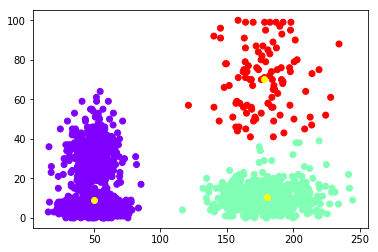

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X,y,c=Kmean.labels_,cmap='rainbow')
plt.scatter([50.04763437,180.34311782,177.83509615],
            [8.82875,10.52011494,70.28846154],c='yellow')
plt.show()